In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

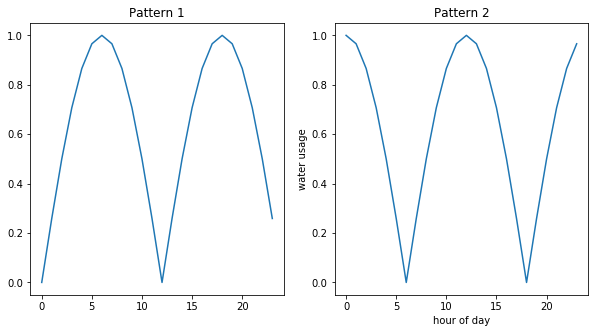

In [2]:
typical_daily_abundance_1 = np.abs(np.sin(2*np.pi*np.arange(24)/24))
typical_daily_abundance_2 = np.abs(np.cos(2*np.pi*np.arange(24)/24))
noise = (np.random.random(24)-0.5)*2
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(typical_daily_abundance_1)
ax2.plot(typical_daily_abundance_2)
ax1.set_title('Pattern 1')
ax2.set_title('Pattern 2')


ax2.set_xlabel('hour of day')
ax2.set_ylabel('water usage')

# plt.suptitle('original signals')
plt.show()


In [3]:
typical_daily_abundance_1+typical_daily_abundance_2

array([1.        , 1.22474487, 1.3660254 , 1.41421356, 1.3660254 ,
       1.22474487, 1.        , 1.22474487, 1.3660254 , 1.41421356,
       1.3660254 , 1.22474487, 1.        , 1.22474487, 1.3660254 ,
       1.41421356, 1.3660254 , 1.22474487, 1.        , 1.22474487,
       1.3660254 , 1.41421356, 1.3660254 , 1.22474487])

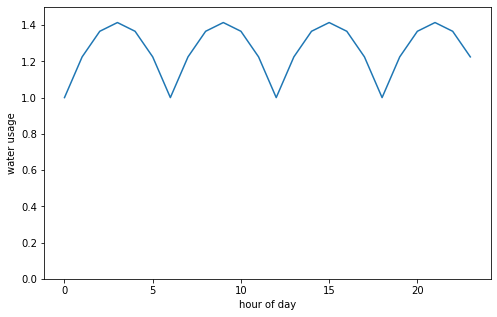

In [4]:
f,ax1 = plt.subplots(1,1,figsize=(8,5))
plt.plot(typical_daily_abundance_1 + typical_daily_abundance_2)
ax1.set_xlabel('hour of day')
ax1.set_ylabel('water usage')
ax1.set_ylim(0,1.5)
plt.show()

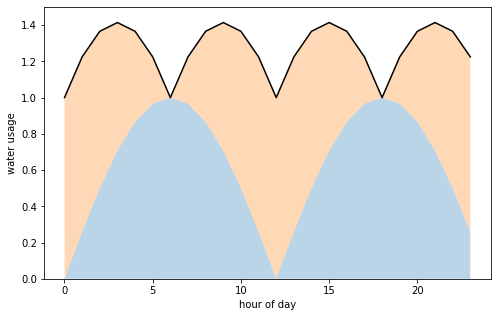

In [5]:
f,ax1 = plt.subplots(1,1,figsize=(8,5))
plt.stackplot(np.arange(24),[typical_daily_abundance_1,typical_daily_abundance_2],alpha=0.3)
plt.plot(typical_daily_abundance_1 + typical_daily_abundance_2,c='black')
ax1.set_xlabel('hour of day')
ax1.set_ylabel('water usage')
ax1.set_ylim(0,1.5)
plt.show()

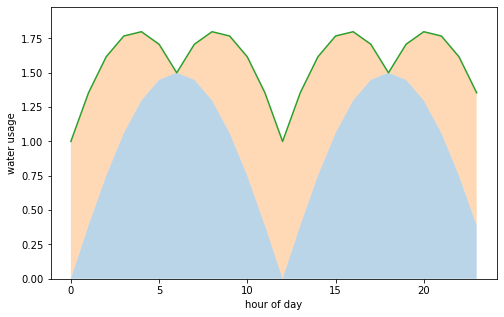

In [6]:
f,ax1 = plt.subplots(1,1,figsize=(8,5))

combined_signal = typical_daily_abundance_1*1.5 + typical_daily_abundance_2

plt.stackplot(np.arange(24),[typical_daily_abundance_1*1.5, typical_daily_abundance_2],alpha=0.3)
plt.plot(typical_daily_abundance_1*1.5 + typical_daily_abundance_2)
ax1.set_xlabel('hour of day')
ax1.set_ylabel('water usage')
ax1.set_ylim(0,np.max(combined_signal)*1.1)
plt.show()

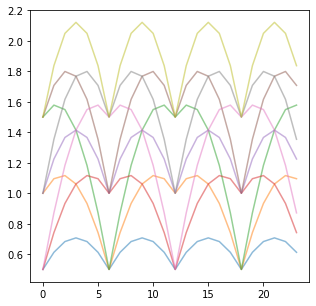

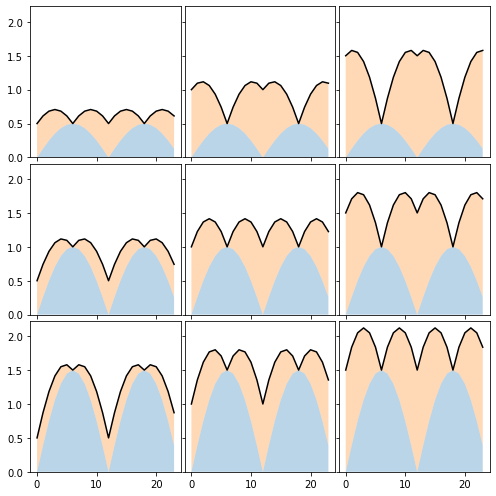

In [7]:
f2,axes2 = plt.subplots(1,1,figsize=(5,5))
f,axes = plt.subplots(3,3,figsize=(7,7),sharex=True,sharey=True)
for i,ax_row in enumerate(axes):
    for j,ax in enumerate(ax_row):
        
        w1 = 1 + (i-1)/2
        w2 = 1 + (j-1)/2
        axes2.plot(typical_daily_abundance_1*w1 + typical_daily_abundance_2*w2,alpha=0.5)
        ax.stackplot(np.arange(24),[typical_daily_abundance_1*w1, typical_daily_abundance_2*w2],alpha=0.3)
        ax.plot(typical_daily_abundance_1*w1 + typical_daily_abundance_2*w2,c='black')
        
        
#         ax.set_xlabel('hour of day')
#         ax.set_ylabel('water usage')
#         ax.set_ylim(0,np.max(combined_signal)*1.1)

plt.tight_layout(h_pad = 0.01,w_pad = 0.01)
plt.show()

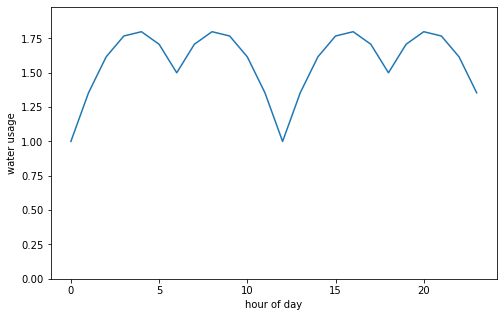

In [8]:
f,ax1 = plt.subplots(1,1,figsize=(8,5))
combined_signal = typical_daily_abundance_1*1.5 + typical_daily_abundance_2
plt.plot(typical_daily_abundance_1*1.5 + typical_daily_abundance_2)
ax1.set_xlabel('hour of day')
ax1.set_ylabel('water usage')
ax1.set_ylim(0,np.max(combined_signal)*1.1)
plt.show()

# Results from first test

In [1]:
from tensorly.decomposition.candecomp_parafac import *
# from tensorly.decomposition import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import NMF
from tensorly.kruskal_tensor import *

In [2]:
df_test = pd.read_csv('./PARAFAC implementation/Testing Data/K036VRÁS-RS211.csv',index_col=0)
df_test.index = pd.DatetimeIndex(df_test.CTime)
df_test = df_test.loc[df_test.OkPct >= 98]
df_test = df_test.loc[df_test.Flag == 524480]


In [3]:
x = df_test.loc[(df_test.CType == 4) & (df_test.Val > 0),:].Val
x = x.resample('1h').mean()
x = x.fillna(method='ffill')
weekhour_index = x.index.weekday * 24 + x.index.hour
first_0 = np.argwhere(weekhour_index == 0)[0,0]
last_0 = np.argwhere(weekhour_index == 0)[-1,0]
x = x.iloc[first_0:last_0]
X = x.values.reshape((-1,7,24))

In [4]:
(core_tesnor,loadingsA),errors = non_negative_parafac(X,
                                                     rank=3,
                                                     n_iter_max = 10000,
                                                     tol=1e-10,
                                                     return_errors=True,)
l_weeks,l_days,l_hours = loadingsA

TypeError: non_negative_parafac() got an unexpected keyword argument 'return_errors'

In [ ]:
plt.plot(errors)
plt.loglog()

In [ ]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.show()

In [ ]:
reconstructed = khatri_rao(loadingsA)
f,axes = plt.subplots(3,1,figsize=(16,5*3))
weekshift = -10
for i,w in enumerate(axes):
    i = i+weekshift
    start,end = 24*7*i,24*7*(i+1)
    
    combined = reconstructed.sum(axis=-1)
    w.stackplot(np.arange(24*7),reconstructed[start:end,:].T,alpha=0.15)
    
    w.plot(combined[start:end],c='red',linestyle='--')
    w.plot(X.ravel()[start:end],c='black')
    
    w.legend(['Reconstructed','True'],loc='upper right')

In [ ]:
(core_tesnor,loadingsB),errors = non_negative_parafac(X.reshape(-1,24*7),
                                                     rank=3,
                                                     n_iter_max = 10000,
                                                     tol=1e-10,  
                                                     return_errors=True, 
                                                     normalize_factors=False)
l_weeks,l_weekhours = loadingsB

In [ ]:
plt.plot(errors)
plt.loglog()

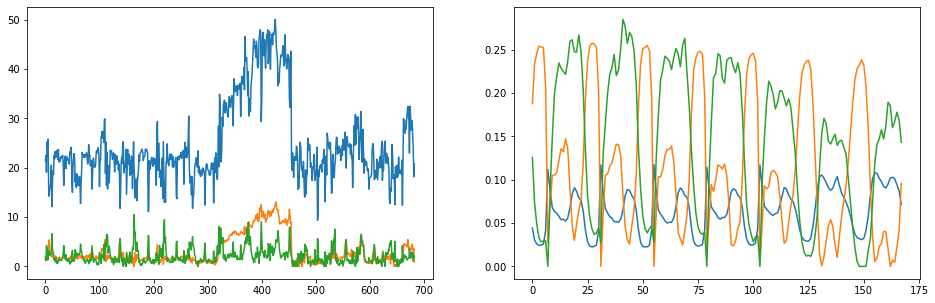

In [18]:
f,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_weekhours)
plt.show()

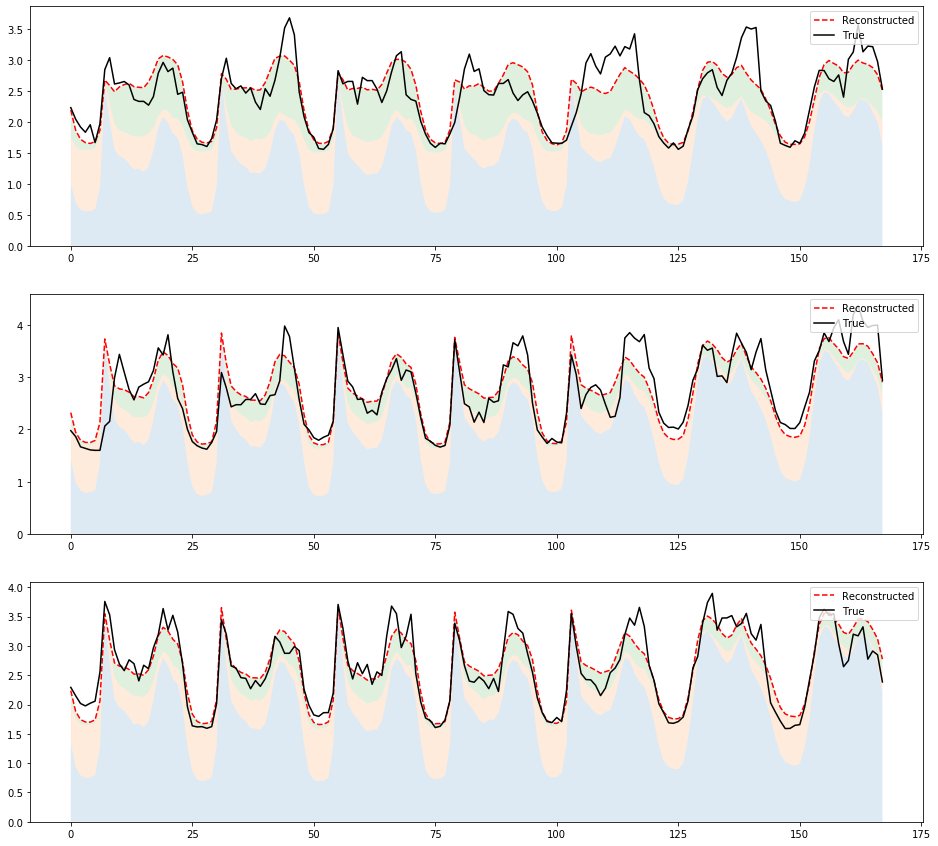

In [19]:
reconstructed = khatri_rao(loadingsB)
f,axes = plt.subplots(3,1,figsize=(16,5*3))
weekshift = -10
for i,w in enumerate(axes):
    i = i+weekshift
    start,end = 24*7*i,24*7*(i+1)
    
    combined = reconstructed.sum(axis=-1)
    w.stackplot(np.arange(24*7),reconstructed[start:end,:].T,alpha=0.15)
    
    w.plot(combined[start:end],c='red',linestyle='--')
    w.plot(X.ravel()[start:end],c='black')
    
    w.legend(['Reconstructed','True'],loc='upper right')

In [20]:
nmf = NMF(3,max_iter=100000,tol=1e-15,)#beta_loss= 'kullback-leibler',solver = 'mu')
abundances = nmf.fit_transform(X.reshape(-1,24*7))


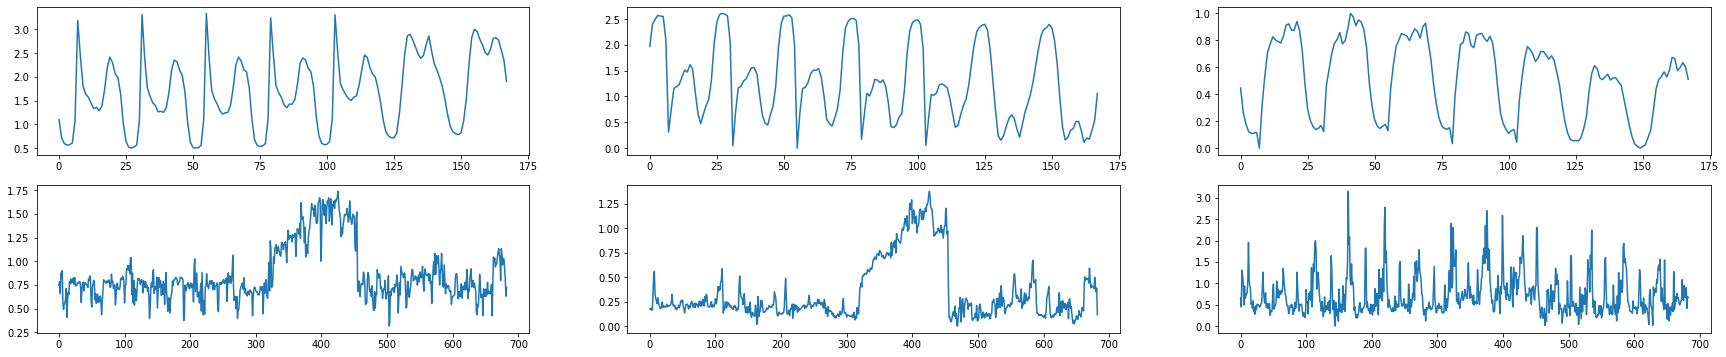

In [21]:
f,ax = plt.subplots(2,3,figsize=(30,6))
components = nmf.components_
ax[0,0].plot(components[0])
ax[0,1].plot(components[1])
ax[0,2].plot(components[2])
ax[1,0].plot(abundances[:,0])
ax[1,1].plot(abundances[:,1])
ax[1,2].plot(abundances[:,2])

In [22]:
from sklearn.decomposition import PCA
pca = PCA(3,whiten=False)
abundances_pca = pca.fit_transform(X.reshape(-1,24*7))
components_pca = pca.components_

In [23]:
reconstructed_0 = (abundances[:,0].reshape(-1,1) @ components[0,:].reshape(1,-1)).ravel()
reconstructed_1 = (abundances[:,1].reshape(-1,1) @ components[1,:].reshape(1,-1)).ravel()
reconstructed_2 = (abundances[:,2].reshape(-1,1) @ components[2,:].reshape(1,-1)).ravel()
reconstructed_C = np.array([reconstructed_0, reconstructed_1, reconstructed_2]).T


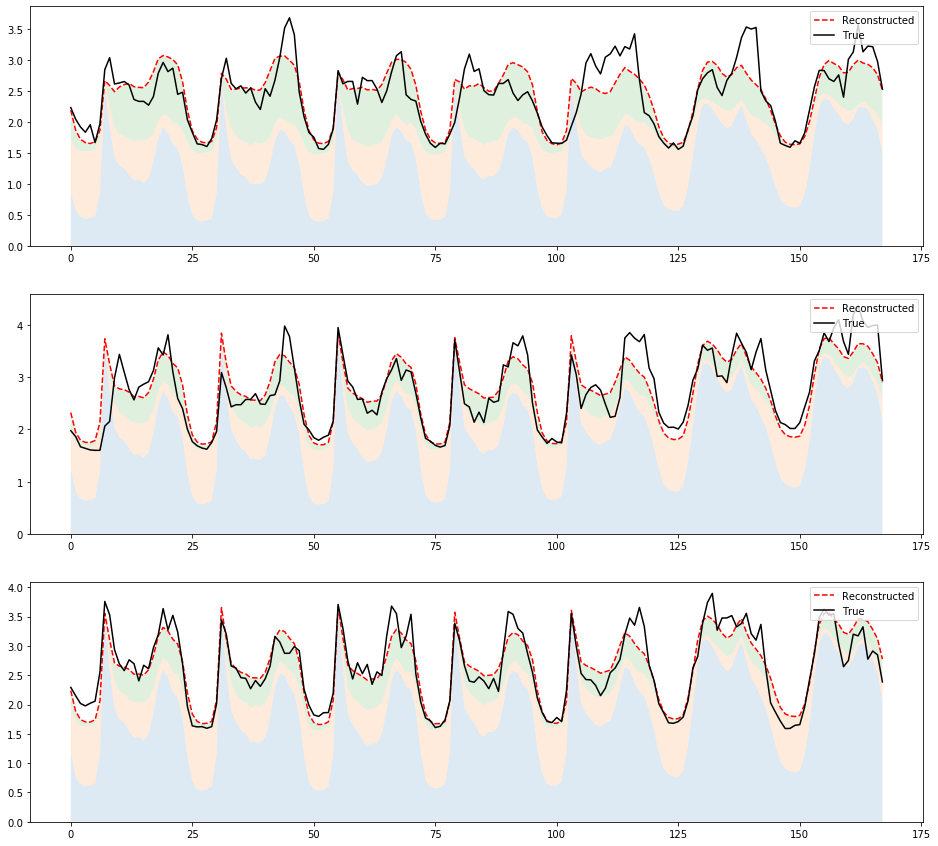

In [24]:

f,axes = plt.subplots(3,1,figsize=(16,5*3))
weekshift = -10
for i,w in enumerate(axes):
    i = i+weekshift
    start,end = 24*7*i,24*7*(i+1)
    
    combined = reconstructed_C.sum(axis=-1)
    w.stackplot(np.arange(24*7),reconstructed_C[start:end,:].T,alpha=0.15)
    
    w.plot(combined[start:end],c='red',linestyle='--')
    w.plot(X.ravel()[start:end],c='black')
    
    w.legend(['Reconstructed','True'],loc='upper right')

In [25]:
abundances

array([[0.74527112, 0.1756419 , 0.65403113],
       [0.78532274, 0.17102607, 0.44784403],
       [0.65734487, 0.18230982, 1.31081225],
       ...,
       [0.8300016 , 0.34982842, 0.41390808],
       [0.63050581, 0.38697624, 0.68319363],
       [0.72234448, 0.11569307, 0.67067177]])

In [26]:
components.shape

(3, 168)

In [27]:
reconstructedA = khatri_rao(loadingsA)
reconstructedB = khatri_rao(loadingsB)
reconstructedC = nmf.inverse_transform(abundances).ravel()
reconstructedD = khatri_rao([components_pca.T,abundances_pca])

In [28]:
components.shape

(3, 168)

In [29]:
components.shape

(3, 168)

In [30]:
reconstructed_0 = (abundances[:,0].reshape(-1,1) @ components[0,:].reshape(1,-1)).ravel()
reconstructed_1 = (abundances[:,1].reshape(-1,1) @ components[1,:].reshape(1,-1)).ravel()
reconstructed_2 = (abundances[:,2].reshape(-1,1) @ components[2,:].reshape(1,-1)).ravel()
reconstructed_C_manual = reconstructed_0 + reconstructed_1 + reconstructed_2

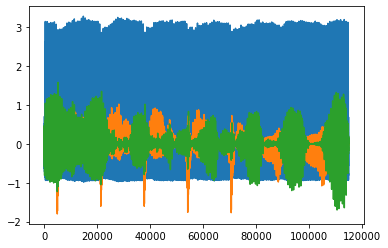

In [31]:
plt.plot(reconstructedD)

In [32]:
flat_factors = [(1,2),(2,2)]
(core_tesnor,loadingsCustom),errors = non_negative_parafac_custom(X,
                                                            rank=3,
                                                            n_iter_max = 10000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = flat_factors,
                                                            normalize_factors=False)
l_weeks,l_days,l_hours = loadingsCustom

[]

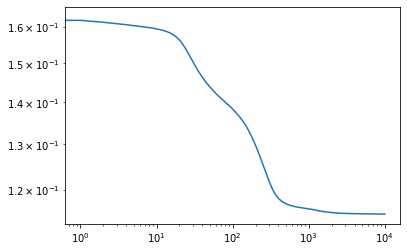

In [33]:
plt.plot(errors)
plt.loglog()

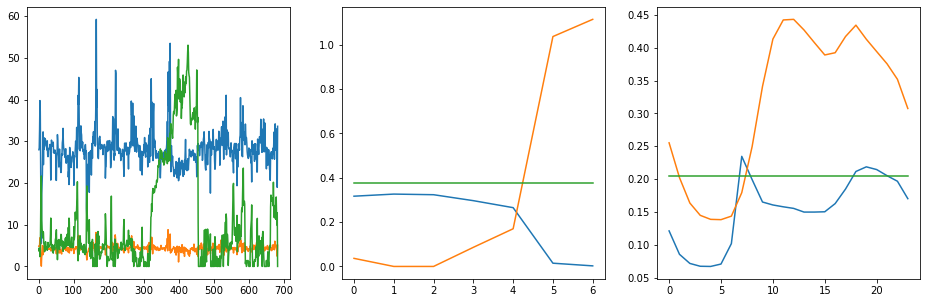

In [34]:
f,ax = plt.subplots(1,3,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_days)
ax[2].plot(l_hours)
plt.show()

In [35]:
(core_tesnor,loadingsCustom2),errors = non_negative_parafac_custom(X.reshape(-1,24*7),
                                                            rank=3,
                                                            n_iter_max = 10000,
                                                            tol=1e-10,  
                                                            return_errors=True, 
                                                            flat_factors = [(1,0)],
                                                            normalize_factors=False)
l_weeks,l_weekhours = loadingsCustom2

[]

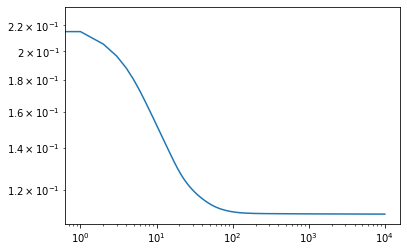

In [36]:
plt.plot(errors)
plt.loglog()

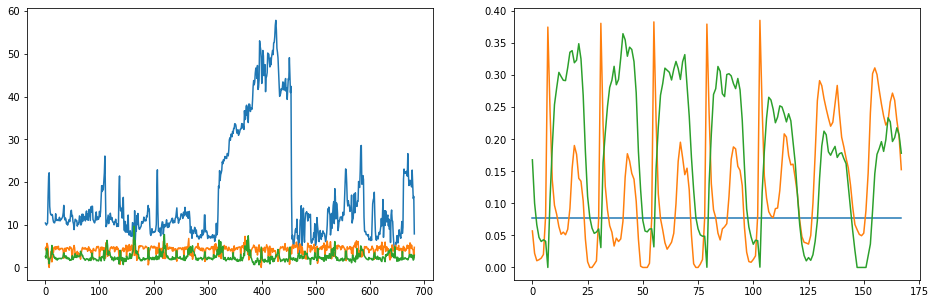

In [37]:
f,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(l_weeks)
ax[1].plot(l_weekhours)
plt.show()

In [38]:
reconstructedCustom = khatri_rao(loadingsCustom)
reconstructedCustom2 = khatri_rao(loadingsCustom2)

In [39]:
print('mean\t\t\t\t',\
      np.mean((np.mean(X) - X.ravel())**2))
print('daily rolling mean\t\t',\
      np.mean((pd.Series(X.ravel()).rolling(24).mean() - X.ravel())**2))
print('bi-daily rolling mean\t\t',\
      np.mean((pd.Series(X.ravel()).rolling(48).mean() - X.ravel())**2))
print('weekly rolling mean\t\t',\
      np.mean((pd.Series(X.ravel()).rolling(24*7).mean() - X.ravel())**2))
print('1 week-shift\t\t\t',\
      np.mean((pd.Series(X.ravel()).shift(24*7) - X.ravel())**2))
print('1 day-shift\t\t\t',\
      np.mean((pd.Series(X.ravel()).shift(24) - X.ravel())**2))
print('3-way, rank-3 custom PARAFAC\t',\
      np.mean((reconstructedCustom.sum(axis=1) - X.ravel())**2))
print('3-way, rank-3 PARAFAC\t\t',\
      np.mean((reconstructedA.sum(axis=1) - X.ravel())**2))
print('2-way, rank-3 custom PARAFAC\t',\
      np.mean((reconstructedCustom2.sum(axis=1) - X.ravel())**2))
print('2-way, rank-3 PARAFAC\t\t',\
      np.mean((reconstructedB.sum(axis=1) - X.ravel())**2))
print('3 factor NMF\t\t\t',\
      np.mean((reconstructed_C_manual - X.ravel())**2))
print('3 factor PCA\t\t\t',\
      np.mean((pca.inverse_transform(abundances_pca).ravel() - X.ravel())**2))

mean				 1.20087749553336
daily rolling mean		 0.31784076108512044
bi-daily rolling mean		 0.3261704818293166
weekly rolling mean		 0.3464053892079962
1 week-shift			 0.20091348646234117
1 day-shift			 0.18177820515686105
3-way, rank-3 custom PARAFAC	 0.08288982441271683
3-way, rank-3 PARAFAC		 0.08393529831662735
2-way, rank-3 custom PARAFAC	 0.07539930401746384
2-way, rank-3 PARAFAC		 0.07510178367523956
3 factor NMF			 0.07508680848656722
3 factor PCA			 0.06943532086067851


In [40]:
print('daily rolling mean\t\t',\
                                          np.corrcoef(pd.Series(X.ravel()).rolling(24,min_periods=0).mean(), X.ravel())[0,1])
print('bi-daily rolling mean\t\t',\
                                          np.corrcoef(pd.Series(X.ravel()).rolling(48,min_periods=0).mean(), X.ravel())[0,1])
print('weekly rolling mean\t\t',\
                                          np.corrcoef(pd.Series(X.ravel()).rolling(24*7,min_periods=0).mean(), X.ravel())[0,1])
print('1 week-shift\t\t\t',\
                                          np.corrcoef(pd.Series(X.ravel()).shift(24*7).dropna(), X.ravel()[24*7:])[0,1])
print('1 day-shift\t\t\t',\
                                          np.corrcoef(pd.Series(X.ravel()).shift(24).dropna(), X.ravel()[24:])[0,1])
print('3-way, rank-3 custom PARAFAC\t',\
                                          np.corrcoef(reconstructedCustom.sum(axis=1), X.ravel())[0,1])
print('3-way, rank-3 PARAFAC\t\t',\
                                          np.corrcoef(reconstructedA.sum(axis=1), X.ravel())[0,1])
print('2-way, rank-3 custom PARAFAC\t',\
                                          np.corrcoef(reconstructedCustom2.sum(axis=1), X.ravel())[0,1])
print('2-way, rank-3 PARAFAC\t\t',\
                                          np.corrcoef(reconstructedB.sum(axis=1), X.ravel())[0,1])
print('3 factor NMF\t\t\t',\
                                          np.corrcoef(reconstructed_C_manual, X.ravel())[0,1])
print('3 factor PCA\t\t\t',\
                                          np.corrcoef(pca.inverse_transform(abundances_pca).ravel(), X.ravel())[0,1])

daily rolling mean		 0.8575381242836794
bi-daily rolling mean		 0.8534899528332583
weekly rolling mean		 0.8435364571612312
1 week-shift			 0.9164075071630275
1 day-shift			 0.924321593819152
3-way, rank-3 custom PARAFAC	 0.9648708880609321
3-way, rank-3 PARAFAC		 0.9644196614426235
2-way, rank-3 custom PARAFAC	 0.9680977018263326
2-way, rank-3 PARAFAC		 0.96822565915249
3 factor NMF			 0.968232096190005
3 factor PCA			 0.9706593190360556


In [41]:
score_dict = {'mean':1.20087749553336,       
              'weekly rolling mean':0.3464053892079962,    
              'bi-daily rolling mean':0.3261704818293166,  
              'daily rolling mean':0.31784076108512044,   
              '1 week-shift':0.20091348646234117,    
              '1 day-shift':0.18177820515686105,    
              '3-way, rank-3 custom PARAFAC':0.08288982441271686,    
              '3-way, rank-3 PARAFAC':0.08393529831662735,    
              '2-way, rank-3 custom PARAFAC':0.07539930401746382,    
              '2-way, rank-3 PARAFAC':0.07510178367523956,    
              '3 factor NMF':0.07508680848656724,    
              '3 factor PCA':0.06943532086067844}

In [42]:
r2_score_dict = {
    'daily rolling mean':0.8575381242836794,
    'bi-daily rolling mean':0.8534899528332583,
    'weekly rolling mean':0.8435364571612312,
    '1 week-shift':0.9164075071630275,
    '1 day-shift':0.924321593819152,
    '3-way, rank-3 custom PARAFAC':0.9648708880609324,
    '3-way, rank-3 PARAFAC':0.9644196614426233,
    '2-way, rank-3 custom PARAFAC':0.9892911098245584,
    '2-way, rank-3 PARAFAC':0.96822565915249,
    '3 factor NMF':0.9819044330600439,
    '3 factor PCA':0.9706593190360557,
    
}

(0, 0.36)

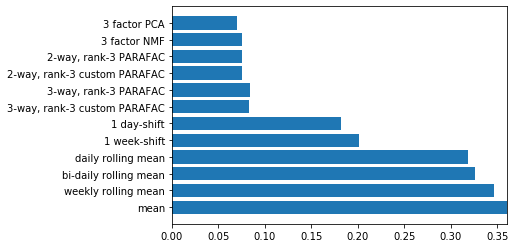

In [43]:
plt.barh(list(score_dict.keys()),[score_dict[x] for x in score_dict],)
plt.xlim(0,0.36)

<BarContainer object of 12 artists>

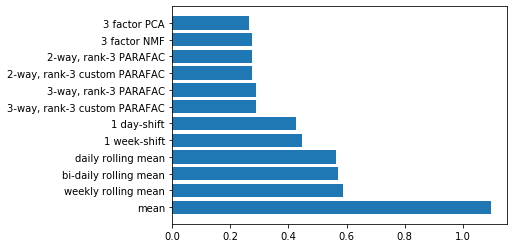

In [44]:
plt.barh(list(score_dict.keys()),[np.sqrt(score_dict[x]) for x in score_dict],)
# plt.xlim(0,0.36)

(0.8, 1)

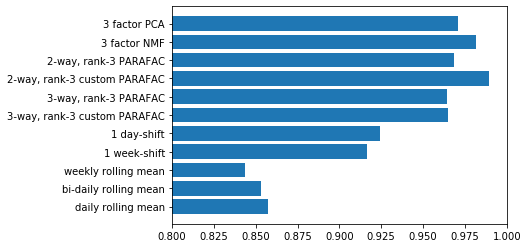

In [45]:
plt.barh(list(r2_score_dict.keys()),[r2_score_dict[x] for x in r2_score_dict],)
plt.xlim(0.8,1)

# Normal data

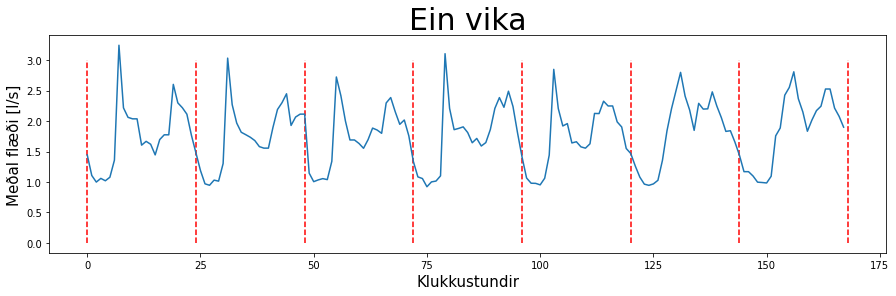

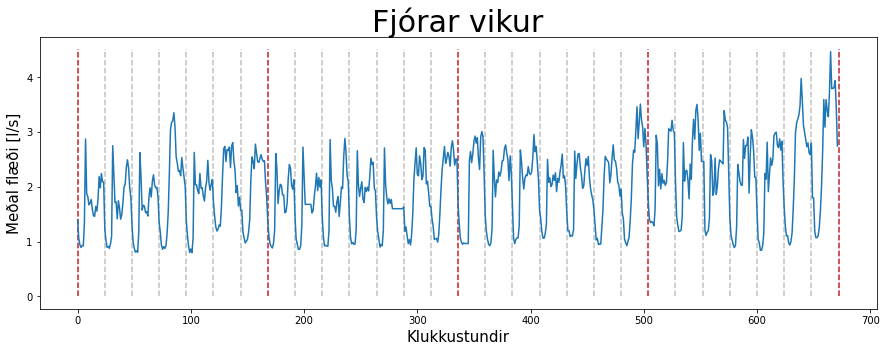

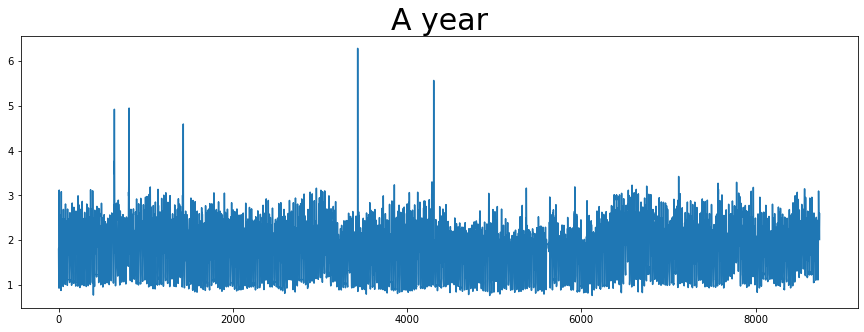

In [31]:
plt.figure(figsize=(15,4))

plt.plot(X[20].ravel())
plt.title('Ein vika',fontsize=30)
plt.xlabel('Klukkustundir',fontsize=15)
plt.ylabel('Meðal flæði [l/s]',fontsize=15)
plt.vlines(np.arange(0,169,24),0,3,color='red',linestyle='--')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(X[:4].ravel())
plt.title('Fjórar vikur',fontsize=30)
plt.xlabel('Klukkustundir',fontsize=15)
plt.ylabel('Meðal flæði [l/s]',fontsize=15)
plt.vlines(np.arange(0,168*4+1,24*7),0,4.5,color='red',linestyle='--')
plt.vlines(np.arange(0,168*4+1,24)  ,0,4.5,color='grey',linestyle='--',alpha=0.5)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(X[30:30+52].ravel())
plt.title('A year',fontsize=30)
plt.show()

In [127]:
from matplotlib import gridspec
from matplotlib.lines import Line2D

def left_weekplot(week,ax,to_zero = False):
    if to_zero:
        min_val = 0
    else:
        min_val = np.min(X[week])
    max_val = np.max(X[week])
    
    ax.plot(X[week].ravel()[:24*5],color='blue')
    ax.plot(np.arange(24*5,24*7),X[week].ravel()[24*5:],color='red')
    ax.vlines(np.arange(0,169,24),min_val,max_val,color='grey',linestyle='--')
    ax.set_title('Flæðimælingar frá einni viku',fontsize=20)
    ax.set_xlabel('Klukkustundir',fontsize=15)
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=15)
        # Legend
    legend_elements = [Line2D([0], [0], color='b', label='Vinnuvika'),
                       Line2D([0], [0], color='r', label='Helgi')]

    ax.legend(handles=legend_elements,loc='lower right')

def right_weekplot(week,ax):
    ax.plot(X[week].reshape(7,24).T[:,:5],color='blue')
    ax.plot(X[week].reshape(7,24).T[:,5:],color='red' )
    ax.set_title('Flæðimælingar frá einni viku',fontsize=20)
    ax.set_xlabel('Klukkustundir',fontsize=15)
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=15)


    # Legend
    legend_elements = [Line2D([0], [0], color='b', label='Vinnuvika'),
                       Line2D([0], [0], color='r', label='Helgi')]


    ax.legend(handles=legend_elements,loc='lower right')
    
def weekplot(week = 20):
    fig = plt.figure(figsize=(16, 9)) 
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1]) 
    ax = [plt.subplot(gs[0]),plt.subplot(gs[1]),plt.subplot(gs[2])]
    
    min_val = np.min(X[week])
    max_val = np.max(X[week])
    
    left_weekplot(week,ax[0])
    right_weekplot(week,ax[1])
    area_plot_predictions(week,ax=ax[2])
    
    plt.tight_layout()

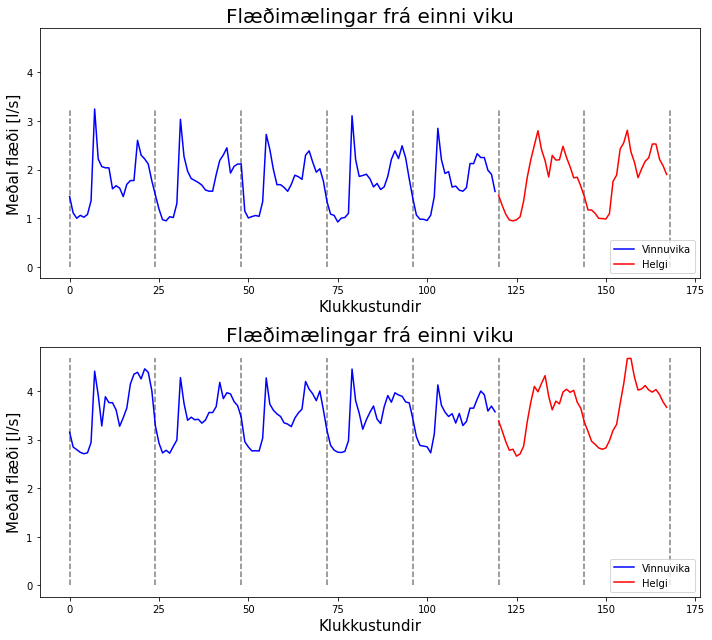

In [128]:
f,ax = plt.subplots(2,1,figsize=(10,9),sharey=True)
left_weekplot(20,ax = ax[0],to_zero = True)
left_weekplot(350,ax = ax[1],to_zero = True)
plt.tight_layout()
# plt.ylim(0,4.7)
# weekplot(20)
# weekplot(350)

In [ ]:
from matplotlib import gridspec
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(16, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
ax = [plt.subplot(gs[0]),plt.subplot(gs[1])]

ax[0].plot(X[20].ravel()[:24*5],color='blue')
ax[0].plot(np.arange(24*5,24*7),X[20].ravel()[24*5:],color='red')
ax[0].vlines(np.arange(0,169,24),0,3,color='grey',linestyle='--')
ax[0].set_title('Flæðimælingar frá einni viku',fontsize=20)
ax[0].set_xlabel('Klukkustundir',fontsize=15)
ax[0].set_ylabel('Meðal flæði [l/s]',fontsize=15)

ax[1].plot(X[20].reshape(7,24).T[:,:5],color='blue')
ax[1].plot(X[20].reshape(7,24).T[:,5:],color='red' )
ax[1].set_title('Flæðimælingar frá einni viku',fontsize=20)
ax[1].set_xlabel('Klukkustundir',fontsize=15)
ax[1].set_ylabel('Meðal flæði [l/s]',fontsize=15)


# Legend
legend_elements = [Line2D([0], [0], color='b', label='Vinnuvika'),
                   Line2D([0], [0], color='r', label='Helgi')]

ax[0].legend(handles=legend_elements,loc='lower right')
ax[1].legend(handles=legend_elements,loc='lower right')

plt.show()

In [58]:
l_weekhours.shape

(168, 3)

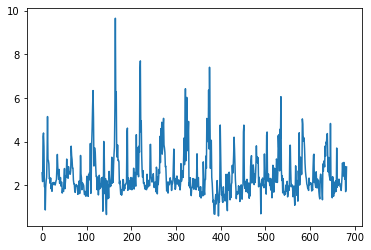

In [52]:
plt.plot(l_weeks[:,2])

In [92]:
import datetime as dt

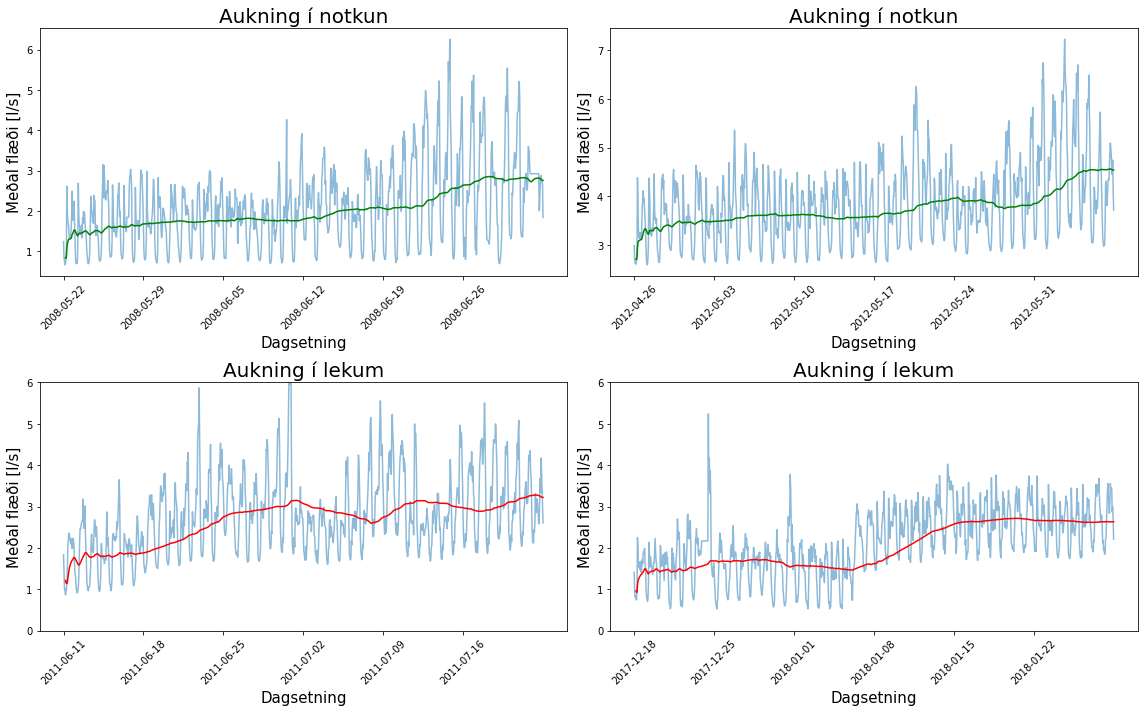

In [101]:
f,ax = plt.subplots(2,2,figsize=(16,10),sharex=False)

date_of_interest_1 = dt.date(2008,6,5)
date_of_interest_2 = dt.date(2012,5,10)
dates_of_interest_ok = [date_of_interest_1,date_of_interest_2]
date_of_interest_3 = dt.date(2011,6,25)
date_of_interest_4 = dt.date(2018,1,1)
dates_of_interest_bad = [date_of_interest_3,date_of_interest_4]

for date,upper in zip(dates_of_interest_ok,ax[0]):
    start,end = date-dt.timedelta(weeks=2.1),date+dt.timedelta(weeks=4)
    subset = x.loc[start:end]
    upper.plot(subset.index,subset,alpha=0.5)
    upper.plot(subset.rolling(168,min_periods=5).mean(),c='green')
    
    upper.set_xticks(np.arange(start,end,dt.timedelta(weeks=1)))
    upper.xaxis.set_tick_params(rotation=45)
    
    upper.set_title('Aukning í notkun',fontsize=20)
    upper.set_xlabel('Dagsetning',fontsize=15)
    upper.set_ylabel('Meðal flæði [l/s]',fontsize=15)
    
for date,lower in zip(dates_of_interest_bad,ax[1]):
    
    start,end = date-dt.timedelta(weeks=2.1),date+dt.timedelta(weeks=4)
    subset = x.loc[start:end]
    lower.plot(subset.index,subset,alpha=0.5)
    lower.plot(subset.rolling(168,min_periods=5).mean(),c='red')

    lower.set_xticks(np.arange(start,end,dt.timedelta(weeks=1)))
    lower.xaxis.set_tick_params(rotation=45)
    lower.set_ylim(0,6)
    lower.set_title('Aukning í lekum',fontsize=20)
    lower.set_xlabel('Dagsetning',fontsize=15)
    lower.set_ylabel('Meðal flæði [l/s]',fontsize=15)
    
    
plt.tight_layout()

### Overview of data for a few neighbourhoods
- Skerjafjörður
- ??? (iðnaðar)
- Víðidalur

In [130]:
df = pd.read_csv('./PARAFAC implementation/Testing data/combined_sensor_data_average_ok_values.csv',index_col = 0)

C:\Users\sverrirhd\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [135]:
df_sker = df.loc[df.Name == 'K-RVK-036-RS211']
df_vidi = df.loc[df.Name == 'K-RVK-002-RS261']


def clean_subset(data,upper):
    data.index = pd.DatetimeIndex(data.CTime)
    data = data.sort_index()
    x = data.loc[(data.Val > 0) & (data.Val < upper),:].Val
    x = x.resample('1h').mean()
    x = x.fillna(method='ffill')
    weekhour_index = x.index.weekday * 24 + x.index.hour
    first_0 = np.argwhere(weekhour_index == 0)[0,0]
    last_0 = np.argwhere(weekhour_index == 0)[-1,0]
    x = x.iloc[first_0:last_0]
    return x
    
x_sker = clean_subset(df_sker,8)
x_vidi = clean_subset(df_vidi,12)

In [233]:
from matplotlib.text import OffsetFrom
font_dict = {
    'super_title_fontsize':20,
    'title_fontsize':15,
    'label_fontsize':10
}
def whole_timeline_plot(data,ax,color=None):
    ax.plot(data,color=color)
    ax.set_xlabel('Tími',fontsize=font_dict['label_fontsize'])
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=font_dict['label_fontsize'])
    ax.set_title('Allar mælingar',fontsize=font_dict['title_fontsize'])

def highlight_year_in_timeline_plot(data,ax,year,color=None):
    ax.plot(data.loc[data.index.year == year],color=color)
    
def one_year_plot(data,ax,year,color=None):
    ax.plot(data.loc[data.index.year == year],color=color)
    ax.set_xlabel('Tími',fontsize=font_dict['label_fontsize'])
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=font_dict['label_fontsize'])
    ax.set_title(f'Árið {year} í mælingum',fontsize=font_dict['title_fontsize'])

def one_week_plot(data,ax,year,week,color=None):
    ax.plot(data.loc[(data.index.year == year) & (data.index.isocalendar().week == week)],color=color)
    ax.set_xlabel('Tími',fontsize=font_dict['label_fontsize'])
    ax.set_ylabel('Meðal flæði [l/s]',fontsize=font_dict['label_fontsize'])
    ax.set_title(f'{week}. vika ársins {year} í mælingum',fontsize=font_dict['title_fontsize'])
    
def highlight_week_in_one_year_plot(data,ax,year,week,color=None):
    ax.plot(data.loc[(data.index.year == year) & (data.index.isocalendar().week == week)],color=color)

def add_day_seperator(data,ax,year,week):
    subset = data.loc[(data.index.year == year) & (data.index.isocalendar().week == week)]
    days = np.unique(subset.index.date)
    min_val,max_val = 0,subset.max()
    ax.vlines(days,min_val,max_val,color='grey',linestyle='--')

def overview_plot(data,name,year = 2008,week = 10,color=None):
    f,ax = plt.subplots(3,1,figsize=(10,10))
    
    c1 = '#1f77b4'
    c2 = '#ff7f0e'
    c3 = '#2ca02c'
    
    # Top
    whole_timeline_plot(data,ax[0],color=c1)
    highlight_year_in_timeline_plot(data,ax[0],year,color=c2)
    # Center
    one_year_plot(data,ax[1],year,color=c2)
    highlight_week_in_one_year_plot(data,ax[1],year,week,color=c3)
    # Bottom
    one_week_plot(data,ax[2],year,week,color=c3)
    add_day_seperator(data,ax[2],year,week)
    

    
    f.suptitle(f'{name} - Yfirlit af mælingum',fontsize=font_dict['super_title_fontsize'])
    plt.tight_layout()
    plt.show()

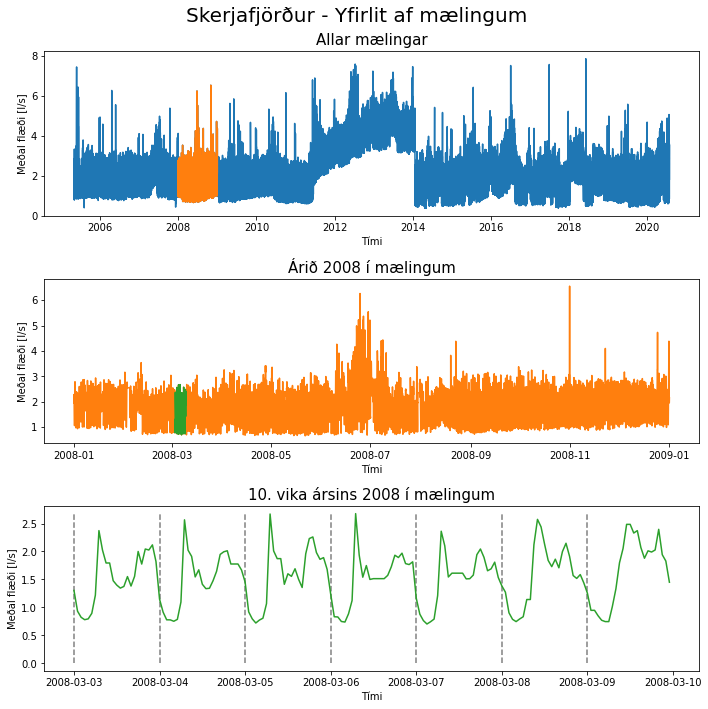

In [234]:
overview_plot(x_sker,'Skerjafjörður')

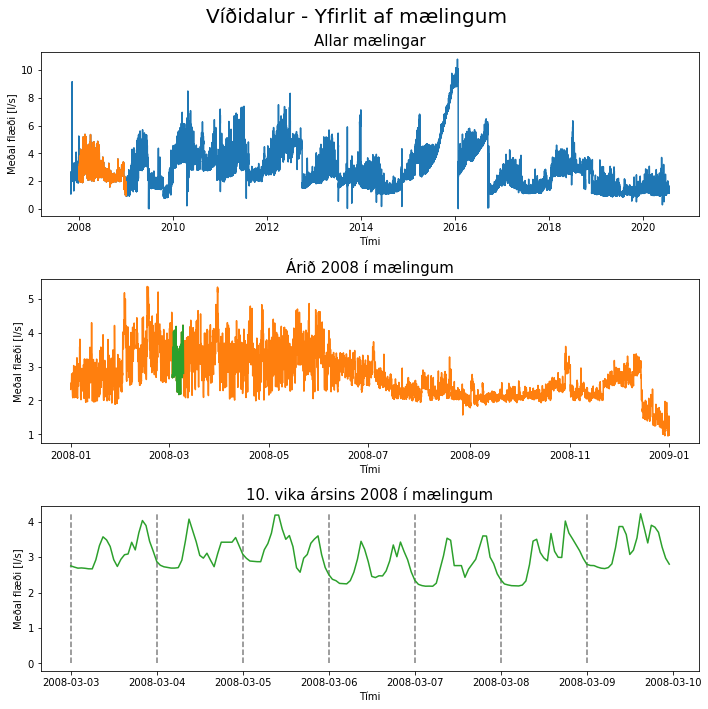

In [235]:
overview_plot(x_vidi,'Víðidalur')